In [2]:
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit_textbook.widgets import plot_bloch_vector_spherical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


import pickle

%matplotlib inline


# Create your circuit below


In [61]:
n = 4
circuit = QuantumCircuit(n)
circuit.h(range(n))
for i in range(n):
    circuit.ry(Parameter('c_'+str(i)), i)

for i in range(int(n/2)):
    circuit.crz(Parameter('s_'+str(i)+str(int(n/2))), i, int(n/2))
    circuit.crz(Parameter('s_'+str(i)+str(int(n/2)+1)), i, int(n/2)+1)


for i in range(n):
    circuit.rx(Parameter('theta_'+str(i)), i)


print(circuit_drawer(circuit, output="latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_0})} & \ctrl{2} & \ctrl{3} & \gate{\mathrm{R_X}\,(\mathrm{theta_0})} & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_1})} & \qw & \qw & \ctrl{1} & \ctrl{2} & \gate{\mathrm{R_X}\,(\mathrm{theta_1})} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_2})} & \gate{\mathrm{R_Z}\,(\mathrm{s_02})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{s_12})} & \qw & \gate{\mathrm{R_X}\,(\mathrm{theta_2})} & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_3})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{s_03})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{s_13}

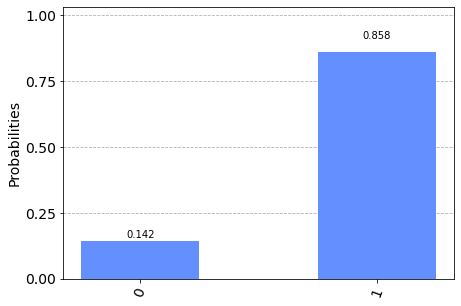

In [31]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.ry(np.pi/4, 0)
circuit.measure_all()
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(circuit, backend), shots=1024)
result = job.result()
counts=result.get_counts(circuit)
plot_histogram(counts)


### The following segment will output the latex code you need to insert into your latex document. Make sure that the imports are done correctly!


```
(2,
[23, 47, 25, 11],
{(0, 2): -6,
(0, 3): -4,
(1, 2): -13,
(1, 3): -6})
```

In [56]:
data = [(2,
[23, 47, 25, 11],
{(0, 2): -6,
(0, 3): -4,
(1, 2): -13,
(1, 3): -6})]

values = []
for row in data:
    values.append(
        np.concatenate([row[1],list(row[2].values())])
        )

scaler = MinMaxScaler((-np.pi/4,np.pi/4))
scaled_data = scaler.fit_transform(values[0].reshape(-1, 1))

scaled_data

array([[ 0.15707963],
       [ 0.78539816],
       [ 0.20943951],
       [-0.15707963],
       [-0.60213859],
       [-0.54977871],
       [-0.78539816],
       [-0.60213859]])

In [57]:
circuit = QuantumCircuit(4)
circuit.h(range(4))
circuit.ry(-0.15707963, 0)
circuit.ry(-0.78539816, 1)
circuit.ry(-0.20943951, 2)
circuit.ry(0.15707963, 3)
circuit.crz(-0.60213859, 0, 2)
circuit.crz(-0.54977871, 0, 3)
circuit.crz(-0.78539816, 1, 2)
circuit.crz(-0.60213859, 1, 3)

print(circuit_drawer(circuit, output="latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{\frac{-\pi}{20}})} & \ctrl{2} & \ctrl{3} & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{\frac{-\pi}{4}})} & \qw & \qw & \ctrl{1} & \ctrl{2} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{\frac{-\pi}{15}})} & \gate{\mathrm{R_Z}\,(\mathrm{-0.6021})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{\frac{-\pi}{4}})} & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{\frac{\pi}{20}})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{-0.5498})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{-0.6021})} & \qw & \qw\\
\\ }}
\end{document}


In [24]:
state = Statevector.from_instruction(QuantumCircuit(1))
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_0.svg', bbox_inches='tight', pad_inches=0)

In [16]:
qc = QuantumCircuit(1)
qc.x(0)
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_1.svg', bbox_inches='tight', pad_inches=0)

In [23]:
qc = QuantumCircuit(1)
qc.h(0)
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_h.svg', bbox_inches='tight', pad_inches=0)

In [21]:
qc = QuantumCircuit(4)
qc.h(range(4))
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_h_multiqubit.svg', bbox_inches='tight', pad_inches=0)

In [4]:
qc = QuantumCircuit(1)
qc.h(range(1))
qc.ry(0.5, 0)
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_ry_0_5.svg', bbox_inches='tight', pad_inches=0)
qc = QuantumCircuit(1)
qc.h(range(1))
qc.ry(-0.5, 0)
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_ry_-0_5.svg', bbox_inches='tight', pad_inches=0)

#### Use this to generate histograms

In [7]:
counts = {}
counts[0] = 547
counts[1] = 987

fig = plot_histogram(counts)
fig.savefig('../thesis/Appendices/example_histogram.svg', type="svg")

/tmp/ipykernel_685/2013565266.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../thesis/Appendices/example_histogram.svg', type="svg")


In [9]:
circuit = QuantumCircuit(1)
circuit.ry(1.8608, 0)
backend = Aer.get_backend('qasm_simulator')

circuit.measure_all()
job = backend.run(transpile(circuit, backend), shots=5000000)

result = job.result()
counts=result.get_counts(circuit)
fig = plot_histogram(counts)

fig.savefig('../thesis/Appendices/calculated_circuit_histogram.svg', type="svg")

/tmp/ipykernel_970/890443297.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../thesis/Appendices/calculated_circuit_histogram.svg', type="svg")


# Graphs from MQO circuit results

In [4]:
#get best ml weight for circuit
#load weights
weights_path = "mqo/runs/experiments/optimizer_hyperparameters/amsgrad_final.p"
data = pickle.load(open(weights_path, "rb"))[0]
results = data['results'][0]
best_index = results['scoreTesting'].index(max(results['scoreTesting']))
rxweight = results['finalWeights'][best_index][0]

In [88]:
#circuit with ml trained component
circuit = QuantumCircuit(4)
circuit.h(range(4))
for i in range(4):
    circuit.ry(Parameter('c_'+str(i)), i)
for i in range(2):
    for j in range(2,4,1):
        circuit.crz(Parameter('s_' + str(i)+str(j)), i, j)
circuit.rx(np.pi/4, range(4))
print(circuit_drawer(circuit, output="latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_0})} & \ctrl{2} & \ctrl{3} & \gate{\mathrm{R_X}\,(\mathrm{\frac{\pi}{4}})} & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_1})} & \qw & \qw & \ctrl{1} & \ctrl{2} & \gate{\mathrm{R_X}\,(\mathrm{\frac{\pi}{4}})} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_2})} & \gate{\mathrm{R_Z}\,(\mathrm{s_02})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{s_12})} & \qw & \gate{\mathrm{R_X}\,(\mathrm{\frac{\pi}{4}})} & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_3})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{s_03})} & \qw & \gate{\mathrm{R_

In [42]:
results_ml = "mqo/runs/experiments/final_runs/static_ml_solver.p"
results_static = "mqo/runs/experiments/final_runs/static_solver.p"
data_ml = pickle.load(open(results_ml, "rb"))
data_static = pickle.load(open(results_static, "rb"))

In [18]:
ml_simulator_filtered_accuracy = data_ml['accuracy_simulator']
ml_simulator_parity_accuracy = data_ml['accuracy_parity_simulator']
ml_real_hw_filtered_accuracy = data_ml['accuracy_real_hardware']
ml_real_hw_parity_accuracy = data_ml['accuracy_parity_real_hardware']


In [20]:
stc_simulator_accuracy = data_static['accuracy_simulator']
stc_real_hw_accuracy = data_static['accuracy_real_hardware']

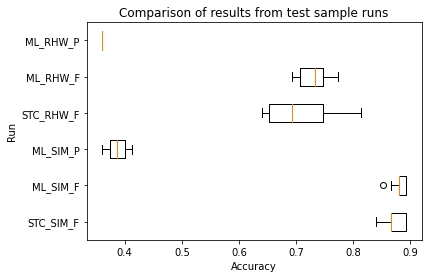

In [36]:
boxplot_data = [stc_simulator_accuracy, ml_simulator_filtered_accuracy, ml_simulator_parity_accuracy, stc_real_hw_accuracy, ml_real_hw_filtered_accuracy, ml_real_hw_parity_accuracy]
fig, ax = plt.subplots()
ax.set_title("Comparison of results from test sample runs")
ax.boxplot(boxplot_data, vert=False, labels=['STC_SIM_F', 'ML_SIM_F', 'ML_SIM_P', 'STC_RHW_F', 'ML_RHW_F', 'ML_RHW_P'])
ax.set_xlabel("Accuracy")
ax.set_ylabel("Run")
plt.show()

In [3]:
amsgrad_final_training = "mqo/runs/experiments/optimizer_hyperparameters/amsgrad_final.p"
ml_final_training = pickle.load(open(amsgrad_final_training, "rb"))

In [4]:
training_scores = ml_final_training[0]['results'][0]['scoreTraining']
testing_scores = ml_final_training[0]['results'][0]['scoreTesting']
final_weights = np.array(ml_final_training[0]['results'][0]['finalWeights']).flatten()

In [53]:
max(testing_scores)

0.4533333333333333

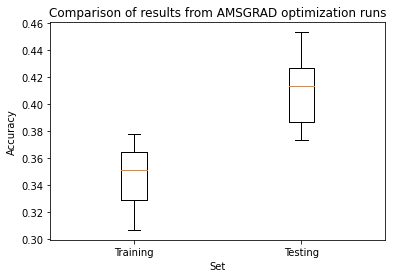

In [6]:
boxplot_data = [training_scores, testing_scores]
fig, ax = plt.subplots()
ax.set_title("Comparison of results from AMSGRAD optimization runs")
ax.boxplot(boxplot_data, labels=['Training', 'Testing'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Set")
plt.show()
fig.savefig('../thesis/Appendices/final_amsgrad_training_boxplot.svg')

In [67]:
labels = [1,10,25,50,75,100,150,200,350,500,1000,1500,2000,10000]
labels = [str(a) for a in labels]
distances = [[],[],[],[]]
distances[0] = [29.94,45.84,56.5,64.14,68.92,70.3,74.68,76.62,78.4,80.3,82.3,84.02,84.7,86.08]
distances[1] = [25.32,27.12,25.34,24.28,21.9,21.18,19.06,17.24,16.16,15.2,13.76,12.86,12.34,11.4]
distances[2] = [23.22,16.4,11.72,8.22,6.58,6.06,4.66,5,4.28,3.72,3.52,2.7,2.7,2.42]
distances[3] = [21.52,10.64,6.44,3.36,2.6,2.46,1.6,1.14,1.16,0.78,0.42,0.42,0.26,0.1]
growth_rate = []
for i in range(len(distances[0])):
    if i == 0:
        growth_rate.append(np.inf)
    else:
        growth_rate.append(distances[0][i]/distances[0][i-1])


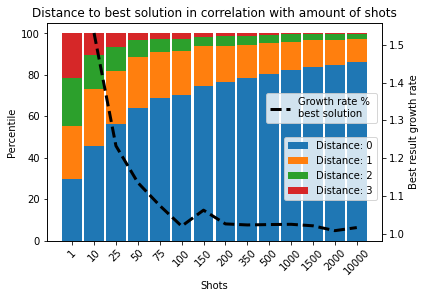

In [85]:
fig, ax = plt.subplots()
width = 0.9
ax.bar(labels, distances[0], width, label='Distance: ' +str(0))
ax.bar(labels, distances[1], width, label='Distance: ' +str(1), bottom=distances[0])
ax.bar(labels, distances[2], width, label='Distance: ' +str(2), bottom=np.add(distances[0],distances[1]))
ax.bar(labels, distances[3], width, label='Distance: ' +str(3), bottom=np.add(np.add(distances[0],distances[1]),distances[2]))
plt.xticks(rotation=45)
ax2 = ax.twinx()
ax2.plot(growth_rate, label='Growth rate % \nbest solution', color = 'black', linewidth=3, linestyle='dashed')
ax2.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.7))
ax.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax.set_title('Distance to best solution in correlation with amount of shots')
ax.set_xlabel('Shots')
ax.set_ylabel('Percentile')
ax2.set_ylabel('Best result growth rate')
plt.show()
fig.savefig('../thesis/Appendices/comparison_shots_to_solution.svg')

['0.830078125', '0.8642578125', '0.85546875', '0.861328125', '0.8544921875', '0.861328125', '0.8388671875', '0.8623046875', '0.8447265625', '0.8408203125', '0.84765625', '0.8740234375', '0.8544921875']


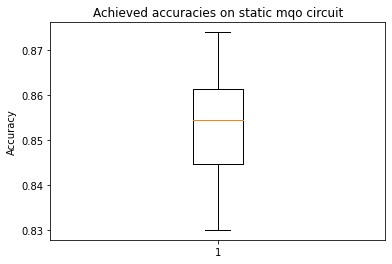

In [3]:
import csv

og_path = "mqo/runs/functionality_analysis/"
max_iter = 13
accuracies = []
for i in range(1,max_iter+1):
    with open(og_path+"iteration_"+str(i)+"_accuracy.csv", newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        for row in reader:
            accuracies.append(row[0])
print(accuracies)

fig, ax = plt.subplots()
ax.set_title("Achieved accuracies on static mqo circuit")
ax.boxplot(np.array(accuracies, dtype='float64'))
ax.set_ylabel("Accuracy")
plt.show()
fig.savefig('../thesis/Appendices/static_circuit_accuracies_boxplot.svg')

In [4]:
path = 'mqo/runs/experiments/final_runs/'
savename = 'all_runs_done_accuracies.p'
final_evaluation_data = pickle.load(open(path+savename, "rb"))

In [5]:

static = {'simulator_acc': final_evaluation_data['static_simulator_filtered_accuracy'],
         'simulator_acc_dist': final_evaluation_data['static_simulator_filtered_distances'],
         'real_hw_acc': final_evaluation_data['static_real_hw_filtered_accuracy'],
         'real_hw_dist': final_evaluation_data['static_real_hw_filtered_distances']}

trained = {'simulator_acc_filtered': final_evaluation_data['ml_simulator_filtered_accuracy'],
         'simulator_acc_filtered_dist': final_evaluation_data['ml_simulator_filtered_distances'],
         'simulator_acc_parity': final_evaluation_data['ml_simulator_parity_accuracy'],
         'simulator_acc_parity_dist': final_evaluation_data['ml_simulator_parity_distances'],
         'real_hw_acc_filtered': final_evaluation_data['ml_real_hw_filtered_accuracy'],
         'real_hw_acc_filtered_dist': final_evaluation_data['ml_real_hw_filtered_distances'],
         'real_hw_acc_parity': final_evaluation_data['ml_real_hw_parity_accuracy'],
         'real_hw_acc_parity_dist': final_evaluation_data['ml_real_hw_parity_distances']}

In [5]:
final_evaluation_data.keys()

dict_keys(['static_simulator_filtered_accuracy', 'static_simulator_filtered_distances', 'static_real_hw_filtered_accuracy', 'static_real_hw_filtered_distances', 'ml_simulator_filtered_accuracy', 'ml_simulator_parity_accuracy', 'ml_simulator_filtered_distances', 'ml_simulator_parity_distances', 'ml_real_hw_filtered_accuracy', 'ml_real_hw_parity_accuracy', 'ml_real_hw_filtered_distances', 'ml_real_hw_parity_distances'])

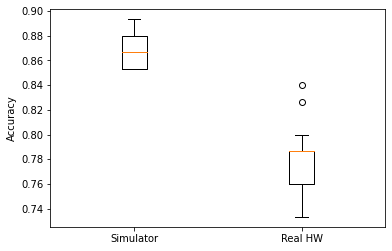

In [6]:
fig, ax = plt.subplots()
ax.boxplot([static['simulator_acc'], static['real_hw_acc']], labels=['Simulator', 'Real HW'])
ax.set_ylabel('Accuracy')
plt.show()

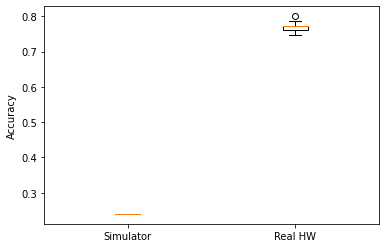

In [9]:
fig, ax = plt.subplots()
ax.boxplot([trained['simulator_acc_filtered'], trained['real_hw_acc_filtered']], labels=['Simulator', 'Real HW'])
ax.set_ylabel('Accuracy')
plt.show()

In [1]:
distance = [[],[],[],[]]
for x in static['simulator_acc_dist']:
    for k in x:
        distance[k].append(x[k])
    distance[-1] = [0]

NameError: name 'static' is not defined

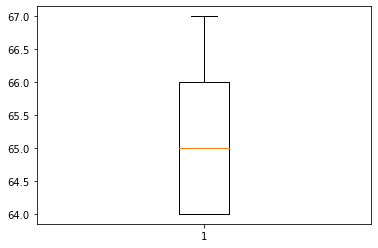

None

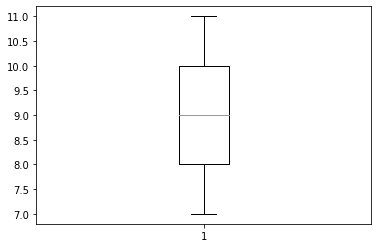

None

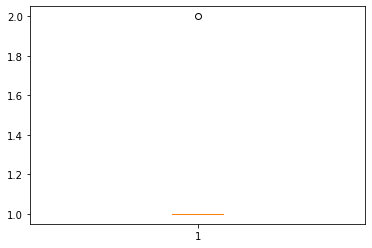

None

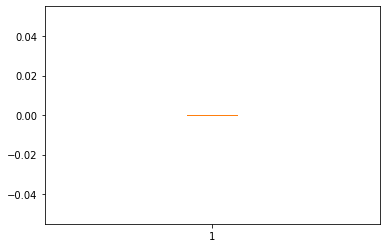

None

In [54]:
for d in distance:
    fix, ax = plt.subplots()
    ax.boxplot(d)
    display(plt.show())

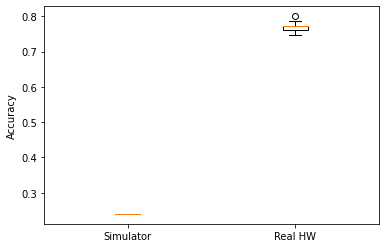

In [59]:
fig, ax = plt.subplots()
ax.boxplot([trained['simulator_acc_filtered'], trained['real_hw_acc_filtered']], labels=['Simulator', 'Real HW'])
ax.set_ylabel('Accuracy')
plt.show()